# A study on the Impact of Reviews on the Quality of Hospitality Education.

## Problem Statement :

### Our goal is to perform a thorough analysis to assess how reviews from current Hospitality education students affect the perceived quality of the program among prospective students.

**Authors:**

    Yeswanth Chamarthy
    
    Keerthi Bai Reddy
    
    Shiva Krishna Reddy
    
    Saranya Chintalapati
    
    Swathi Banna
    


In [1]:
from pyspark.sql import SparkSession;

# warehouse_location points to the default location for managed databases and tables
from os.path import abspath
warehouse_location = abspath('spark-warehouse')

spark = SparkSession \
    .builder \
    .master("local[*]") \
    .appName("ISM6562 PySpark Tutorials") \
    .config("spark.sql.warehouse.dir", warehouse_location) \
    .enableHiveSupport() \
    .getOrCreate()


# Let's get the SparkContext object. It's the entry point to the Spark API. It's created when you create a sparksession
sc = spark.sparkContext

# note: If you have multiple spark sessions running (like from a previous notebook you've run), 
# this spark session webUI will be on a different port than the default (4040). One way to 
# identify this part is with the following line. If there was only one spark session running, 
# this will be 4040. If it's higher, it means there are still other spark sesssions still running.
spark_session_port = spark.sparkContext.uiWebUrl.split(":")[-1]
print("Spark Session WebUI Port: " + spark_session_port)

23/11/10 12:21:24 WARN Utils: Your hostname, localhost.localdomain resolves to a loopback address: 127.0.0.1; using 10.21.10.164 instead (on interface eth0)
23/11/10 12:21:24 WARN Utils: Set SPARK_LOCAL_IP if you need to bind to another address
Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).
23/11/10 12:21:25 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable


Spark Session WebUI Port: 4040


In [2]:
spark

## Creating Database to import the rating data from csv file

In [3]:
from pyspark.sql.types import StructType, StructField, IntegerType, StringType, DateType, FloatType
# see here for more info on the schema: https://spark.apache.org/docs/latest/sql-programming-guide.html#inferring-the-schema-using-reflection
# and here https://sparkbyexamples.com/pyspark/pyspark-sql-types-datatype-with-examples/

schema = StructType([
    StructField("id", IntegerType(), True),
    StructField("rmp_id", IntegerType(), True),
    StructField("university_id", IntegerType(), True),
    StructField("university_name", StringType(), True),
    StructField("name", StringType(), True),
     StructField("url", StringType(), True),
    StructField("reviews", IntegerType(), True),
    StructField("would_take_again", FloatType(), True),
    StructField("level_of_difficulty", FloatType(), True),
    StructField("average_rating", FloatType(), True),
    StructField("average_sentiment", FloatType(), True),
    ])

rmp = spark.read.csv('data/RMP_yesh.csv', header=True, schema=schema)

# display the first 5 rows of the dataframe
rmp.show(5)

23/11/10 12:21:31 WARN CSVHeaderChecker: Number of column in CSV header is not equal to number of fields in the schema:
 Header length: 53, schema size: 11
CSV file: file:///home/student/Documents/ism6562/bd-f23/W10/data/RMP_yesh.csv


+----+-------+-------------+--------------------+-------------------+--------------------+-------+----------------+-------------------+--------------+-----------------+
|  id| rmp_id|university_id|     university_name|               name|                 url|reviews|would_take_again|level_of_difficulty|average_rating|average_sentiment|
+----+-------+-------------+--------------------+-------------------+--------------------+-------+----------------+-------------------+--------------+-----------------+
| 859|1779627|           47|University of Hou...|       Corsi, Aaron|https://www.ratem...|      8|            50.0|                2.0|           5.0|        0.6392089|
|1546|2444419|           76|California State ...|               NULL|https://www.ratem...|      5|            80.0|                2.8|           5.0|        0.4901624|
|  49|2095344|            8| New York University|   Karaburun, Recep|https://www.ratem...|      7|           100.0|                3.0|           5.0|     

In [4]:
rmp.write.saveAsTable("rmp", mode='overwrite')

23/11/10 12:21:33 WARN HiveConf: HiveConf of name hive.stats.jdbc.timeout does not exist
23/11/10 12:21:33 WARN HiveConf: HiveConf of name hive.stats.retries.wait does not exist
23/11/10 12:21:36 WARN ObjectStore: Version information not found in metastore. hive.metastore.schema.verification is not enabled so recording the schema version 2.3.0
23/11/10 12:21:36 WARN ObjectStore: setMetaStoreSchemaVersion called but recording version is disabled: version = 2.3.0, comment = Set by MetaStore student@127.0.0.1
23/11/10 12:21:36 WARN ObjectStore: Failed to get database global_temp, returning NoSuchObjectException
23/11/10 12:21:39 WARN CSVHeaderChecker: Number of column in CSV header is not equal to number of fields in the schema:
 Header length: 53, schema size: 11
CSV file: file:///home/student/Documents/ism6562/bd-f23/W10/data/RMP_yesh.csv
23/11/10 12:21:40 WARN SessionState: METASTORE_FILTER_HOOK will be ignored, since hive.security.authorization.manager is set to instance of HiveAuthor

In [5]:
#rmp.createOrReplaceTempView("rmp_yesh_csv")

In [6]:
#%%sparksql
#select * from movieratings limit 10

In [7]:
dfRating = spark.table('rmp')

In [8]:
spark.sql("show tables").show()

+---------+------------+-----------+
|namespace|   tableName|isTemporary|
+---------+------------+-----------+
|  default|fake_friends|      false|
|  default|         rmp|      false|
|  default|    rmp_yesh|      false|
+---------+------------+-----------+



In [9]:
dfRating.printSchema()

root
 |-- id: integer (nullable = true)
 |-- rmp_id: integer (nullable = true)
 |-- university_id: integer (nullable = true)
 |-- university_name: string (nullable = true)
 |-- name: string (nullable = true)
 |-- url: string (nullable = true)
 |-- reviews: integer (nullable = true)
 |-- would_take_again: float (nullable = true)
 |-- level_of_difficulty: float (nullable = true)
 |-- average_rating: float (nullable = true)
 |-- average_sentiment: float (nullable = true)



In [65]:
df = spark.sql("SELECT  reviews,would_take_again, level_of_difficulty, average_rating, average_sentiment FROM rmp WHERE would_take_again IS NOT NULL")
df.show(10)

+-------+----------------+-------------------+--------------+-----------------+
|reviews|would_take_again|level_of_difficulty|average_rating|average_sentiment|
+-------+----------------+-------------------+--------------+-----------------+
|      8|            50.0|                2.0|           5.0|        0.6392089|
|      5|            80.0|                2.8|           5.0|        0.4901624|
|      7|           100.0|                3.0|           5.0|        0.6140048|
|      9|           100.0|                1.6|           5.0|       0.70555127|
|      9|           100.0|                2.1|           5.0|        0.4918917|
|      5|           100.0|                2.2|           5.0|        0.4223454|
|      5|           100.0|                1.4|           5.0|       0.61469835|
|     21|           100.0|                1.5|           5.0|        0.5472863|
|     10|           100.0|                2.4|           5.0|        0.5222977|
|      6|           100.0|              

In [67]:
x = df.describe()

## Descriptive Statistics of the data

In [68]:
x.show()

23/11/10 12:33:17 WARN SparkStringUtils: Truncated the string representation of a plan since it was too large. This behavior can be adjusted by setting 'spark.sql.debug.maxToStringFields'.


+-------+-----------------+------------------+-------------------+------------------+-------------------+
|summary|          reviews|  would_take_again|level_of_difficulty|    average_rating|  average_sentiment|
+-------+-----------------+------------------+-------------------+------------------+-------------------+
|  count|              766|               766|                766|               766|                766|
|   mean|22.24804177545692| 77.35509138381201|  2.615013053927658|3.9349869502119854| 0.3633880384130204|
| stddev|29.36056828497283|25.479131923721592| 0.7836376968232751|0.8172025998305605|0.22393552554219295|
|    min|                5|               7.0|                1.0|               1.4|         -0.3364033|
|    max|              454|             100.0|                4.9|               5.0|          1.0497341|
+-------+-----------------+------------------+-------------------+------------------+-------------------+



In [73]:
df_univ = spark.sql("SELECT university_name,AVG(average_rating) AS avg_rating,AVG(average_sentiment) AS avg_sentiment, AVG(would_take_again) AS avg_would_take_again,AVG(level_of_difficulty) AS avg_level_of_difficulty FROM rmp WHERE would_take_again IS NOT NULL GROUP BY university_name ORDER BY avg_rating DESC;")
df_univ.show()

+--------------------+------------------+-------------------+--------------------+-----------------------+
|     university_name|        avg_rating|      avg_sentiment|avg_would_take_again|avg_level_of_difficulty|
+--------------------+------------------+-------------------+--------------------+-----------------------+
|      Fisher College|               5.0| 0.7694866061210632|               100.0|      2.799999952316284|
|University of Nor...|               5.0| 0.5111562609672546|               100.0|      2.299999952316284|
|University of Ken...| 4.900000095367432| 0.6930010914802551|               100.0|      2.600000023841858|
|Northern Michigan...| 4.800000190734863|0.42824894189834595|               100.0|      3.200000047683716|
|Saint Leo University| 4.800000190734863| 0.4106598496437073|               100.0|     1.7000000476837158|
|    SUNY Morrisville| 4.800000190734863|  0.707730770111084|               100.0|      2.799999952316284|
|Morgan State Univ...| 4.800000190734

## Data exploration

In [74]:
import matplotlib.pyplot as plt
import pandas as pd

In [77]:

pandas_df = df.toPandas()


### Level of Difficulty Vs Average Rating Plot

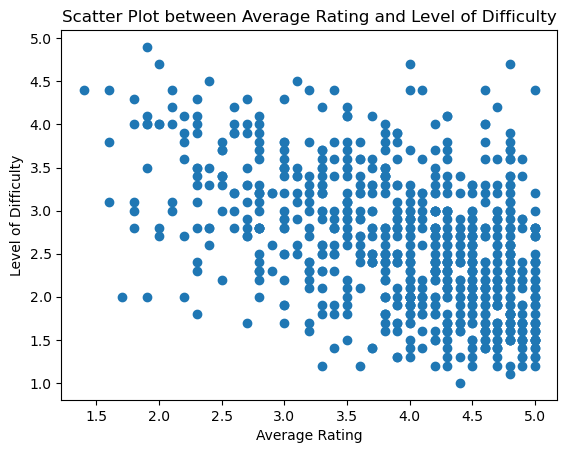

In [78]:
plt.scatter(pandas_df["average_rating"], pandas_df["level_of_difficulty"])
plt.xlabel("Average Rating")
plt.ylabel("Level of Difficulty")
plt.title("Scatter Plot between Average Rating and Level of Difficulty")
plt.show()

### Level of Difficulty Vs Average Sentiment Plot

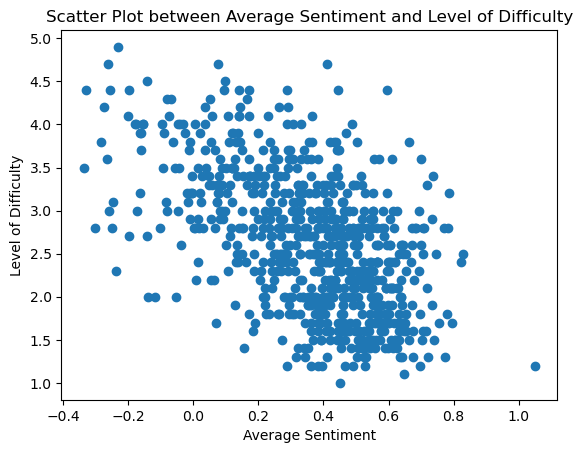

In [80]:
plt.scatter(pandas_df["average_sentiment"], pandas_df["level_of_difficulty"])
plt.xlabel("Average Sentiment")
plt.ylabel("Level of Difficulty")
plt.title("Scatter Plot between Average Sentiment and Level of Difficulty")
plt.show()

### Level of Difficulty Vs Would Take again Plot

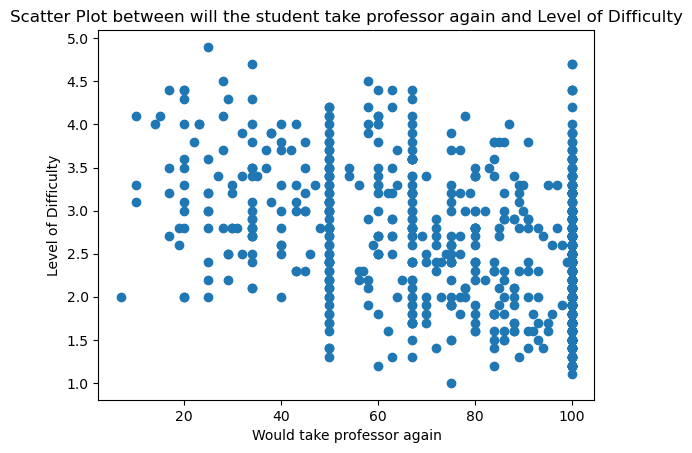

In [82]:
plt.scatter(pandas_df["would_take_again"], pandas_df["level_of_difficulty"])
plt.xlabel("Would take professor again")
plt.ylabel("Level of Difficulty")
plt.title("Scatter Plot between will the student take professor again and Level of Difficulty")
plt.show()

### Would take again Vs Average Rating Plot

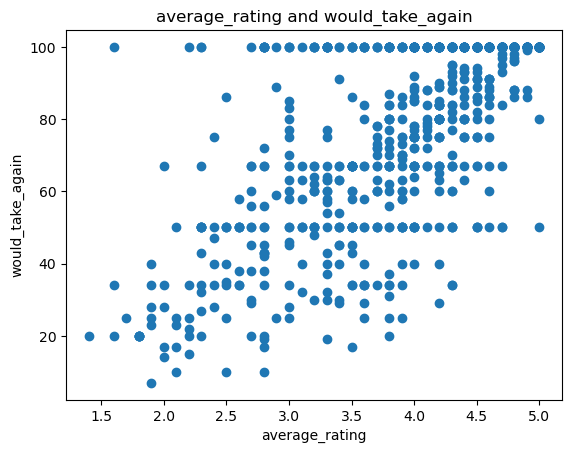

In [83]:
plt.scatter(pandas_df["average_rating"], pandas_df["would_take_again"])
plt.xlabel("average_rating")
plt.ylabel("would_take_again")
plt.title("average_rating and would_take_again")
plt.show()

### Query to fetch all the features and labels required for analysis

In [11]:
dfRmp = spark.sql("SELECT reviews,would_take_again, level_of_difficulty, average_rating, average_sentiment FROM rmp WHERE would_take_again IS NOT NULL")
dfRmp.show(10)

+-------+----------------+-------------------+--------------+-----------------+
|reviews|would_take_again|level_of_difficulty|average_rating|average_sentiment|
+-------+----------------+-------------------+--------------+-----------------+
|      8|            50.0|                2.0|           5.0|        0.6392089|
|      5|            80.0|                2.8|           5.0|        0.4901624|
|      7|           100.0|                3.0|           5.0|        0.6140048|
|      9|           100.0|                1.6|           5.0|       0.70555127|
|      9|           100.0|                2.1|           5.0|        0.4918917|
|      5|           100.0|                2.2|           5.0|        0.4223454|
|      5|           100.0|                1.4|           5.0|       0.61469835|
|     21|           100.0|                1.5|           5.0|        0.5472863|
|     10|           100.0|                2.4|           5.0|        0.5222977|
|      6|           100.0|              

## Train-Test data split

In [12]:
train_data,test_data = dfRmp.randomSplit([0.7,0.3]) 

## Model 1 - Linear Regression

In [13]:
from pyspark.ml.regression import LinearRegression
from pyspark.ml.feature import VectorAssembler
 
# For more on VectorAssembler, see https://spark.apache.org/docs/latest/ml-features.html#vectorassembler 
dfAssemblerFeature =  VectorAssembler(
    inputCols=["level_of_difficulty", "average_rating", "average_sentiment" , "reviews"], 
    outputCol="features"
)
 
train_data  = dfAssemblerFeature.transform(train_data)
train_data.show()



+-------+----------------+-------------------+--------------+-----------------+--------------------+
|reviews|would_take_again|level_of_difficulty|average_rating|average_sentiment|            features|
+-------+----------------+-------------------+--------------+-----------------+--------------------+
|      5|            20.0|                2.0|           2.2|       -0.0531862|[2.0,2.2000000476...|
|      5|            20.0|                2.8|           1.8|       -0.2490962|[2.79999995231628...|
|      5|            20.0|                3.0|           1.8|       -0.2607385|[3.0,1.7999999523...|
|      5|            20.0|                4.4|           1.6|       -0.2561384|[4.40000009536743...|
|      5|            40.0|                2.8|           2.4|       0.00165878|[2.79999995231628...|
|      5|            50.0|                1.3|           3.9|        0.5014638|[1.29999995231628...|
|      5|            50.0|                1.4|           4.0|        0.3511074|[1.399999976

In [14]:
test_data = dfAssemblerFeature.transform(test_data)
test_data.show()

+-------+----------------+-------------------+--------------+-----------------+--------------------+
|reviews|would_take_again|level_of_difficulty|average_rating|average_sentiment|            features|
+-------+----------------+-------------------+--------------+-----------------+--------------------+
|      5|            25.0|                2.0|           1.7|       -0.1402001|[2.0,1.7000000476...|
|      5|            40.0|                3.8|           3.6|        0.4309989|[3.79999995231628...|
|      5|            50.0|                1.8|           4.6|       0.39580613|[1.79999995231628...|
|      5|            50.0|                2.2|           3.5|        0.6792593|[2.20000004768371...|
|      5|            50.0|                2.4|           4.2|       0.23929182|[2.40000009536743...|
|      5|            67.0|                2.8|           4.2|        0.7830478|[2.79999995231628...|
|      5|            80.0|                3.4|           4.2|        0.2830622|[3.400000095

In [15]:
lr_model = LinearRegression(labelCol='would_take_again')
fit_model = lr_model.fit(train_data.select(['features','would_take_again']))

23/11/10 12:21:43 WARN Instrumentation: [36e6cbdb] regParam is zero, which might cause numerical instability and overfitting.


In [16]:
results = fit_model.transform(test_data)
results.show()

+-------+----------------+-------------------+--------------+-----------------+--------------------+------------------+
|reviews|would_take_again|level_of_difficulty|average_rating|average_sentiment|            features|        prediction|
+-------+----------------+-------------------+--------------+-----------------+--------------------+------------------+
|      5|            25.0|                2.0|           1.7|       -0.1402001|[2.0,1.7000000476...|27.478320110830946|
|      5|            40.0|                3.8|           3.6|        0.4309989|[3.79999995231628...| 69.57262860811882|
|      5|            50.0|                1.8|           4.6|       0.39580613|[1.79999995231628...| 92.23118794423543|
|      5|            50.0|                2.2|           3.5|        0.6792593|[2.20000004768371...| 71.64352630553249|
|      5|            50.0|                2.4|           4.2|       0.23929182|[2.40000009536743...|  81.8780636166061|
|      5|            67.0|              

In [17]:
results.select(['would_take_again','prediction']).show()

+----------------+------------------+
|would_take_again|        prediction|
+----------------+------------------+
|            25.0|27.478320110830946|
|            40.0| 69.57262860811882|
|            50.0| 92.23118794423543|
|            50.0| 71.64352630553249|
|            50.0|  81.8780636166061|
|            67.0| 86.27190892668838|
|            80.0| 81.07866792226997|
|           100.0|107.03964770867185|
|           100.0| 88.87385001686648|
|           100.0|100.22867800271312|
|           100.0| 47.70977482671251|
|           100.0| 92.40120223791531|
|           100.0|  66.3878389113873|
|           100.0|  80.3139297497262|
|           100.0|100.59604600226476|
|           100.0| 61.57886680786546|
|           100.0| 99.56057661338052|
|           100.0|  97.6840258394596|
|           100.0| 90.49365902143921|
|            34.0| 69.41945272884365|
+----------------+------------------+
only showing top 20 rows



In [18]:
test_results = fit_model.evaluate(test_data)

In [19]:
test_results.residuals.show()

+--------------------+
|           residuals|
+--------------------+
| -2.4783201108309463|
|  -29.57262860811882|
|  -42.23118794423543|
|  -21.64352630553249|
|   -31.8780636166061|
| -19.271908926688383|
| -1.0786679222699718|
| -7.0396477086718505|
|  11.126149983133516|
|-0.22867800271312433|
|   52.29022517328749|
|   7.598797762084686|
|  33.612161088612694|
|    19.6860702502738|
| -0.5960460022647567|
|   38.42113319213454|
|   0.439423386619481|
|  2.3159741605404065|
|   9.506340978560786|
|  -35.41945272884365|
+--------------------+
only showing top 20 rows



### Evaluation Metrics for Linear Regression

In [20]:
print(f"{'RMSE:':7s} {test_results.rootMeanSquaredError:>7.3f}")
print(f"{'Ex Var:':7s} {test_results.explainedVariance:>7.3f}")
print(f"{'MAE:':7s} {test_results.meanAbsoluteError:>7.3f}")
print(f"{'MSE:':7s} {test_results.meanSquaredError:>7.3f}")
print(f"{'RMSE:':7s} {test_results.rootMeanSquaredError:>7.3f}")
print(f"{'R2:':7s} {test_results.r2:>7.3f}")

RMSE:    20.582
Ex Var: 341.160
MAE:     15.191
MSE:    423.600
RMSE:    20.582
R2:       0.330


In [21]:
#from pyspark.ml.stat import ChiSquareTest
#r = ChiSquareTest.test(dfRmp, "features", "would_take_again").head()
 
#print("pValues: " + str(r.pValues))
#print("degreesOfFreedom: " + str(r.degreesOfFreedom))
#print("statistics: " + str(r.statistics))

In [22]:
# For more information on LinearRegression, see https://spark.apache.org/docs/latest/ml-classification-regression.html#linear-regression
#lr = LinearRegression(maxIter=15, featuresCol="features", labelCol="would_take_again", predictionCol="prediction")
# Fit the model
#lrModel = lr.fit(dfRmp)
 
 
# Print the coefficients and intercept for linear regression
#print(f"Coefficients: {lrModel.coefficients[0]:.5f}")
#print(f"Intercept: {lrModel.intercept:.5f}")



In [23]:
#dfRmp = lrModel.transform(dfRmp)
#dfRmp.show(100)

In [24]:
#trainingSummary = lrModel.summary
#print(f"RMSE: {trainingSummary.rootMeanSquaredError:.4f}")
#print(f"r2: {trainingSummary.r2:.4f}")

## Model 2 - Decision Tree Regression

In [25]:
from pyspark.ml.regression import DecisionTreeRegressor
from pyspark.ml.feature import VectorAssembler, StringIndexer
from pyspark.ml import Pipeline
from pyspark.ml.evaluation import RegressionEvaluator

In [26]:
dfRmp_des = spark.sql("SELECT reviews,would_take_again, level_of_difficulty, average_rating, average_sentiment FROM rmp WHERE would_take_again IS NOT NULL")
dfRmp_des.show(10)

+-------+----------------+-------------------+--------------+-----------------+
|reviews|would_take_again|level_of_difficulty|average_rating|average_sentiment|
+-------+----------------+-------------------+--------------+-----------------+
|      8|            50.0|                2.0|           5.0|        0.6392089|
|      5|            80.0|                2.8|           5.0|        0.4901624|
|      7|           100.0|                3.0|           5.0|        0.6140048|
|      9|           100.0|                1.6|           5.0|       0.70555127|
|      9|           100.0|                2.1|           5.0|        0.4918917|
|      5|           100.0|                2.2|           5.0|        0.4223454|
|      5|           100.0|                1.4|           5.0|       0.61469835|
|     21|           100.0|                1.5|           5.0|        0.5472863|
|     10|           100.0|                2.4|           5.0|        0.5222977|
|      6|           100.0|              

In [27]:
train_data,test_data=dfRmp_des.randomSplit([0.8,0.2])

In [28]:
dfAssemblerFeature =  VectorAssembler(
    inputCols=["level_of_difficulty", "average_rating", "average_sentiment" , "reviews"], 
    outputCol="features"
)
 

In [29]:
dt_model = DecisionTreeRegressor(labelCol='would_take_again', maxBins=5000)

In [30]:
pipe = Pipeline(
    stages=[
        dfAssemblerFeature,
        dt_model
    ]
)

In [31]:

fit_model = pipe.fit(train_data)

23/11/10 12:21:45 WARN DecisionTreeMetadata: DecisionTree reducing maxBins from 5000 to 595 (= number of training instances)


In [32]:
results_dec = fit_model.transform(test_data)

In [33]:
results_dec.show()

+-------+----------------+-------------------+--------------+-----------------+--------------------+------------------+
|reviews|would_take_again|level_of_difficulty|average_rating|average_sentiment|            features|        prediction|
+-------+----------------+-------------------+--------------+-----------------+--------------------+------------------+
|      5|            50.0|                2.4|           4.2|       0.23929182|[2.40000009536743...| 76.97368421052632|
|      5|            60.0|                1.8|           3.3|        0.3876698|[1.79999995231628...| 64.72881355932203|
|      5|            67.0|                2.6|           4.2|        0.5951844|[2.59999990463256...|             90.75|
|      5|            67.0|                2.8|           3.4|        0.3988932|[2.79999995231628...| 64.72881355932203|
|      5|            80.0|                1.6|           3.8|       0.36288086|[1.60000002384185...| 73.02941176470588|
|      5|           100.0|              

In [34]:
results_dec.select(["would_take_again","prediction"]).show()

+----------------+------------------+
|would_take_again|        prediction|
+----------------+------------------+
|            50.0| 76.97368421052632|
|            60.0| 64.72881355932203|
|            67.0|             90.75|
|            67.0| 64.72881355932203|
|            80.0| 73.02941176470588|
|           100.0| 73.02941176470588|
|           100.0|            93.104|
|           100.0|            93.104|
|           100.0|  99.3913043478261|
|           100.0| 64.72881355932203|
|           100.0|             100.0|
|           100.0|             100.0|
|           100.0| 86.94285714285714|
|            34.0| 64.72881355932203|
|            34.0| 64.72881355932203|
|            50.0|44.083333333333336|
|            67.0|            93.104|
|            80.0| 86.94285714285714|
|           100.0|             100.0|
|           100.0| 73.02941176470588|
+----------------+------------------+
only showing top 20 rows



In [35]:
regression_evaluator = RegressionEvaluator(
    labelCol="would_take_again", predictionCol="prediction"
)

### Evalaution Metrics - Decsion Tree Regression

In [36]:
rmse = regression_evaluator.evaluate(results_dec)
print(f"Root Mean Squared Error (RMSE) of the decision tree regressor is {rmse}")

Root Mean Squared Error (RMSE) of the decision tree regressor is 20.549935609644717


In [37]:
mae = regression_evaluator.evaluate(results_dec, {regression_evaluator.metricName: 'mae'})


In [38]:
mse = regression_evaluator.evaluate(results_dec, {regression_evaluator.metricName: 'mse'})


In [39]:
r2 = regression_evaluator.evaluate(results_dec, {regression_evaluator.metricName: 'r2'})


In [40]:
print(f"Mean Absolute Error (MAE): {mae:.3f}")
print(f"Mean Squared Error (MSE): {mse:.3f}")
print(f"R-squared (R2): {r2:.3f}")

Mean Absolute Error (MAE): 14.869
Mean Squared Error (MSE): 422.300
R-squared (R2): 0.354


## Model 3 - Gradient Boost Regression

In [41]:
dfRmp_gbt = spark.sql("SELECT reviews,would_take_again, level_of_difficulty, average_rating, average_sentiment FROM rmp WHERE would_take_again IS NOT NULL")
dfRmp_gbt.show(10)

+-------+----------------+-------------------+--------------+-----------------+
|reviews|would_take_again|level_of_difficulty|average_rating|average_sentiment|
+-------+----------------+-------------------+--------------+-----------------+
|      8|            50.0|                2.0|           5.0|        0.6392089|
|      5|            80.0|                2.8|           5.0|        0.4901624|
|      7|           100.0|                3.0|           5.0|        0.6140048|
|      9|           100.0|                1.6|           5.0|       0.70555127|
|      9|           100.0|                2.1|           5.0|        0.4918917|
|      5|           100.0|                2.2|           5.0|        0.4223454|
|      5|           100.0|                1.4|           5.0|       0.61469835|
|     21|           100.0|                1.5|           5.0|        0.5472863|
|     10|           100.0|                2.4|           5.0|        0.5222977|
|      6|           100.0|              

In [42]:
train_data,test_data=dfRmp_gbt.randomSplit([0.8,0.2])

In [43]:
from pyspark.ml.regression import GBTRegressor
from pyspark.ml.evaluation import RegressionEvaluator
from pyspark.ml.feature import VectorAssembler, StringIndexer
from pyspark.ml import Pipeline


In [44]:
dfAssemblerFeature =  VectorAssembler(
    inputCols=["level_of_difficulty", "average_rating", "average_sentiment" , "reviews"], 
    outputCol="features"
)

In [45]:
gbt_model = GBTRegressor(labelCol='would_take_again', maxBins=5000)

In [46]:
pipe = Pipeline(
    stages=[
        dfAssemblerFeature,
        gbt_model
    ]
)

In [47]:
fit_model = pipe.fit(train_data)
results_gdb = fit_model.transform(test_data)

23/11/10 12:21:47 WARN DecisionTreeMetadata: DecisionTree reducing maxBins from 5000 to 621 (= number of training instances)


In [48]:
results_gdb.show()

+-------+----------------+-------------------+--------------+-----------------+--------------------+------------------+
|reviews|would_take_again|level_of_difficulty|average_rating|average_sentiment|            features|        prediction|
+-------+----------------+-------------------+--------------+-----------------+--------------------+------------------+
|      5|            20.0|                2.0|           2.2|       -0.0531862|[2.0,2.2000000476...|53.334404886437845|
|      5|            20.0|                3.0|           1.8|       -0.2607385|[3.0,1.7999999523...|19.929138413420368|
|      5|            40.0|                2.8|           2.4|       0.00165878|[2.79999995231628...| 65.25926644437759|
|      5|            80.0|                2.4|           3.6|        0.2630027|[2.40000009536743...|51.463172605293714|
|      5|            80.0|                2.4|           4.4|       0.45464447|[2.40000009536743...| 94.51145785717884|
|      5|           100.0|              

In [49]:
evaluator =  RegressionEvaluator(
    labelCol="would_take_again", predictionCol="prediction"
)

### Evaluation Metrics - Gradient Boost Regression

In [50]:
rmse = regression_evaluator.evaluate(results_gdb)
print(f"Root Mean Squared Error (RMSE) of the  Gradient Boosted Tree regressor is {rmse}")

Root Mean Squared Error (RMSE) of the  Gradient Boosted Tree regressor is 21.70320367022308


In [51]:
mae = evaluator.evaluate(results_gdb, {evaluator.metricName: 'mae'})


In [52]:
mse = evaluator.evaluate(results_gdb, {evaluator.metricName: 'mse'})

In [53]:
r2 = evaluator.evaluate(results_gdb, {evaluator.metricName: 'r2'})

In [54]:
print(f"Mean Absolute Error (MAE): {mae:.3f}")
print(f"Mean Squared Error (MSE): {mse:.3f}")
print(f"R-squared (R2): {r2:.3f}")

Mean Absolute Error (MAE): 14.923
Mean Squared Error (MSE): 471.029
R-squared (R2): 0.281


## Hyper paraameter tuning and Cross Validation

In [55]:
from pyspark.ml.tuning import ParamGridBuilder, CrossValidator

In [56]:
# Create a ParamGrid for hyperparameter tuning
param_grid = ParamGridBuilder() \
    .addGrid(gbt_model.maxDepth, [5]) \
    .addGrid(gbt_model.maxBins, [32]) \
    .addGrid(gbt_model.minInstancesPerNode, [1]) \
    .addGrid(gbt_model.stepSize, [0.1]) \
    .build()

In [57]:

# Create a CrossValidator with GBTRegressor and the ParamGrid
crossval = CrossValidator(estimator=pipe,
                          estimatorParamMaps=param_grid,
                          evaluator=evaluator,
                          numFolds=5)

In [58]:
cv_model = crossval.fit(train_data)

In [59]:
best_model = cv_model.bestModel

In [60]:
results_tuned = best_model.transform(test_data)


In [61]:
results_tuned.show()

+-------+----------------+-------------------+--------------+-----------------+--------------------+------------------+
|reviews|would_take_again|level_of_difficulty|average_rating|average_sentiment|            features|        prediction|
+-------+----------------+-------------------+--------------+-----------------+--------------------+------------------+
|      5|            20.0|                2.0|           2.2|       -0.0531862|[2.0,2.2000000476...|  76.4024985206225|
|      5|            20.0|                3.0|           1.8|       -0.2607385|[3.0,1.7999999523...|31.434890790582834|
|      5|            40.0|                2.8|           2.4|       0.00165878|[2.79999995231628...|61.213913256537936|
|      5|            80.0|                2.4|           3.6|        0.2630027|[2.40000009536743...| 83.33061266450568|
|      5|            80.0|                2.4|           4.4|       0.45464447|[2.40000009536743...| 87.00910216981087|
|      5|           100.0|              

## Evaluation Metrics after hyper parameter tuning

In [63]:
rmse_tuned = evaluator.evaluate(results_tuned, {evaluator.metricName: 'rmse'})
mae_tuned = evaluator.evaluate(results_tuned, {evaluator.metricName: 'mae'})
mse_tuned = evaluator.evaluate(results_tuned, {evaluator.metricName: 'mse'})
r2_tuned = evaluator.evaluate(results_tuned, {evaluator.metricName: 'r2'})

In [64]:
print("Tuned Model Metrics:")
print(f"Root Mean Squared Error (RMSE): {rmse_tuned:.3f}")
print(f"Mean Absolute Error (MAE): {mae_tuned:.3f}")
print(f"Mean Squared Error (MSE): {mse_tuned:.3f}")
print(f"R-squared (R2): {r2_tuned:.3f}")

Tuned Model Metrics:
Root Mean Squared Error (RMSE): 20.864
Mean Absolute Error (MAE): 14.649
Mean Squared Error (MSE): 435.295
R-squared (R2): 0.335
